<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений-(upsample)" data-toc-modified-id="Дерево-решений-(upsample)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дерево решений (upsample)</a></span></li><li><span><a href="#Случайный-лес-(upsample)" data-toc-modified-id="Случайный-лес-(upsample)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес (upsample)</a></span></li><li><span><a href="#Логистическая-регрессия-(upsample)" data-toc-modified-id="Логистическая-регрессия-(upsample)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия (upsample)</a></span></li><li><span><a href="#Дерево-решений-(downsample)" data-toc-modified-id="Дерево-решений-(downsample)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Дерево решений (downsample)</a></span></li><li><span><a href="#Случайный-лес-(downsample)" data-toc-modified-id="Случайный-лес-(downsample)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Случайный лес (downsample)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#ROC-AUC" data-toc-modified-id="ROC-AUC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ROC AUC</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import statsmodels.formula.api as smf
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
frame = pd.read_csv("/datasets/Churn.csv")
frame.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3714,3715,15815428,Biryukova,823,France,Male,34,3.0,105057.33,1,1,0,9217.92,0
5609,5610,15661945,Nicolay,623,Spain,Female,40,4.0,0.00,3,1,0,31669.18,0
9939,9940,15808971,Lajoie,693,Spain,Female,57,9.0,0.00,2,1,1,135502.77,0
8596,8597,15780966,Pritchard,709,France,Female,32,2.0,0.00,2,0,0,109681.29,0
8000,8001,15629002,Hamilton,747,Germany,Male,36,8.0,102603.30,2,1,1,180693.61,0


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Выведем на экран нашу таблицу. Мы видим, что нам будет необходимо избавляться от некотьорых столбцов, а также поменять тип данных в столбцах на int. Кромме того мы видим, чо есть пропуски в столбце с Недвижимостью, надо будет подумать, как с ними быть.

In [ ]:
frame.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
frame = frame.drop(["CustomerId","RowNumber", "Surname"], axis = 1)
frame.columns = frame.columns.str.lower()
frame.rename(columns = {'creditscore':'credit_score','numofproducts':'num_products', 'hascrcard':'has_cr_card', 'isactivemember':'is_active', 'estimatedsalary':'salary'}, inplace = True)
frame.head(5)

,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active,salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Для удобства и для дальнейшего решения задач:
    1) уберем ненужные для исследования столбцы "CustomerId","RowNumber", "Surname"
    2) Приведем оставшиеся названия к нижнему регистру и переименуем. Выведем обновленную таблицу.

In [ ]:
frame['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

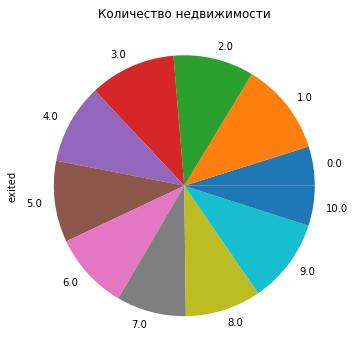

In [ ]:
frame.groupby('tenure')['exited'].sum().plot(figsize = (15,6),kind = 'pie',title = 'Количество недвижимости')
plt.show()

Выведем на экран какое количество недвижимости у наших клиентов

In [ ]:
report = frame.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / frame.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
tenure,909,0.09
credit_score,0,0.00
geography,0,0.00
gender,0,0.00
age,0,0.00
balance,0,0.00
num_products,0,0.00
has_cr_card,0,0.00
is_active,0,0.00
salary,0,0.00


In [ ]:
frame['balance'] = frame['balance'].astype('int64')
frame['salary'] = frame['salary'].astype('int64')

В первую очередь приведем столбцы 'balance' и 'salary' к типу int

In [ ]:
#frame['tenure'] = frame['tenure'].fillna(1).astype('int64')
frame = frame.dropna()
frame['tenure'] = frame['tenure'].astype('int64')


Мы не можем удалить полностью строки, где пропущено значение в Tenure, т.к. это около 10% от исходного датафрейма. Принял решение заменить их на минимально возможное значение: 0.

Пробовал заменить значения на 1. Разница в f1 метрике очень маленькая: не более 0.01, лучшее значение 0.595

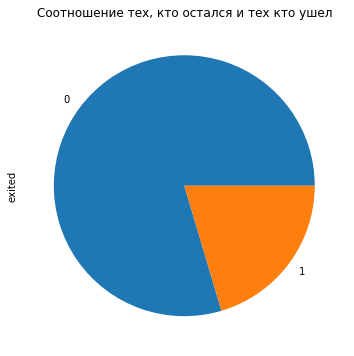

In [ ]:
frame['exited'].value_counts().plot(kind = 'pie',grid = True,figsize = (10,6),title = 'Соотношение тех, кто остался и тех кто ушел')
plt.show()

Перед тем как перейти к прогнозам рассмотрим данные, которые у нас есть. Мы видим, что наши данные несбалансированные: оставшихся больше чем тем, кто ушел. Посмотрим дальше, может быть сразу найдем какую-нибудь зависимость от дополнительных параметров.

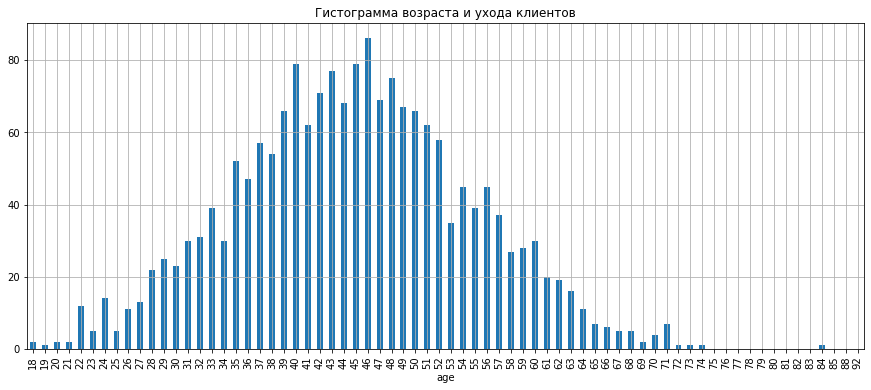

In [ ]:
frame.groupby('age')['exited'].sum().plot(figsize = (15,6),kind='bar',grid = True, title = 'Гистограмма возраста и ухода клиентов')
plt.show()

Во- первых, выведем возраст, при котором клиенту чаще всего уходят. На графике видим, что чаще всего банк покидают люди, возраст которых лежит между 40 и 50. Мы можем сделать несколько предположений: клиентами банка в основном становятся люди похожего возраста, и возможно эта категория самая распространенная; во многих банках не выдаются кредиты либо кредитные карты после 65 лет, а значит вероятность стать клиентом в этом возрасте очень маленькая. Необходимо дальше проверить, есть ли корреляция между ними. 

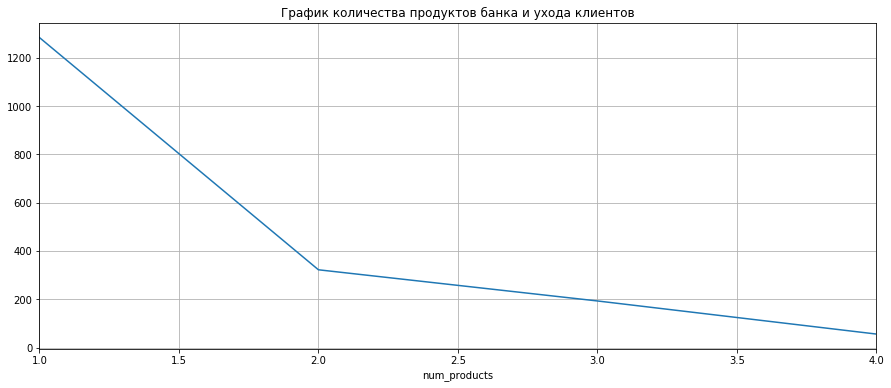

In [ ]:
frame.groupby('num_products')['exited'].sum().plot(figsize = (15,6),kind ='line',grid = True, title = 'График количества продуктов банка и ухода клиентов')
plt.show()

Проверили как количество продуктов влияет на уход. В принципе, мы можем предположить, что возникает следующая ситуация: намного легче уйти в другой банк  (рефинансироваться в другом банке, либо закрыть рассрочку или кредит) когда у тебя 1 продукт. Люди, у которых более 2 продуктов намного сильнее привязаны к банку, особенно если среди этих продуктов не только дебетовые карты, но и кредитные продукты.

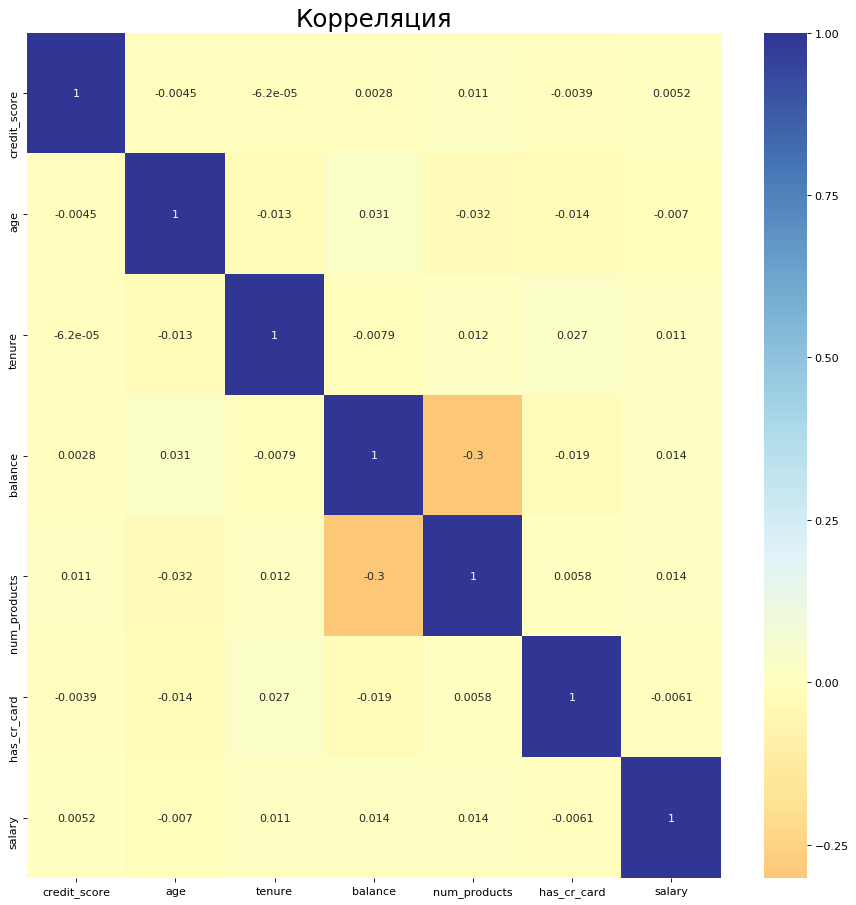

In [ ]:
plt.figure(figsize = (14,14), dpi = 80)
sns.heatmap(frame[['credit_score', 'age', 'tenure',
       'balance', 'num_products', 'has_cr_card', 'salary'
       ]].corr(), xticklabels=frame[['credit_score', 'age', 'tenure',
       'balance', 'num_products', 'has_cr_card', 'salary'
       ]].corr().columns, yticklabels=frame[['credit_score', 'age', 'tenure',
       'balance', 'num_products', 'has_cr_card', 'salary'
       ]].corr().columns, cmap = 'RdYlBu', center = 0, annot = True)
plt.title('Корреляция', fontsize = 22)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Выведем корреляционную матрицу, чтобы проверить есть какая либо зависимость между факторами, прежде чем решить, удалять что - либо или нет.

На матрице мы видим, что фактически нигде нет высоких показателей зависимости между переменными.Самая высокая положительная корреляция между возрастом и уходом из банка, почти 0.3. Однако, это недостаточно высокий показатель, для того, чтобы говорить о сильном влиянии возраста на целевую переменную.


## Исследование задачи

Избавляемся от категориальных признаков методом One hot encoder, выводим таблицу на экран, обозначим признаки и целевой признак.

In [ ]:
df_ohe = pd.get_dummies(frame,drop_first = True)
target = df_ohe['exited']
features = df_ohe.drop(['exited'],axis = 1)
df_ohe.head(5)

,credit_score,age,tenure,balance,num_products,has_cr_card,is_active,salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [ ]:
train_features, valid_features = train_test_split(features, test_size = 0.5, random_state = 48)
valid_features, test_features = train_test_split(valid_features, test_size = 0.5, random_state = 48)
print('Размер тренировочной выборки', train_features.shape[0])
print('Размер валидационной выборки', valid_features.shape[0])
print('Размер тестовой выборки', test_features.shape[0])

Размер тренировочной выборки 4545
Размер валидационной выборки 2273
Размер тестовой выборки 2273


In [ ]:
train_target, valid_target = train_test_split(target, test_size = 0.5, random_state = 48)
valid_target, test_target = train_test_split(valid_target, test_size = 0.5, random_state = 48)
print('Размер тренировочной выборки', train_target.shape[0])
print('Размер валидационной выборки', valid_target.shape[0])
print('Размер тестовой выборки', test_target.shape[0])

Размер тренировочной выборки 4545
Размер валидационной выборки 2273
Размер тестовой выборки 2273



Разбил выборку на 3 части, добавил тестовую часть. Валидационная и тестовая часть по количеству равны. Хотел бы уточнить: а есть ли какой то определеннный или принятый у специалистов размер каждой выборки? Здесь поделил 2:1:1, в ппрошлом проекте было 3:1:1

Разделяем на валидационную и тренировочную выборки, размер - 0.25  

In [ ]:
numeric = ['credit_score','age','tenure','balance','num_products','has_cr_card','is_active', 'salary']
scaler = StandardScaler()
scaler.fit(train_features[numeric])
pd.options.mode.chained_assignment = None
train_features[numeric] = scaler.transform(train_features[numeric])
valid_features[numeric] = scaler.transform(valid_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])

Масштабируем наши признаки, преобразуем обучающую и валидационную выборки функцией transform(). Избегаем предупреждения SettingWithCopy прописываением внутри функции кода: pd.options.mode.chained_assignment = None

### Случайный лес

Начнем проводить исследование: в первую очередь используем Случайный лес. Найдем при каких параметрах (глубина и количество деревьев) находится лучшая мерав F1.

In [ ]:
best_est = 0
best_f1_sc = 0
for est in range(1,50):
    random_model = RandomForestClassifier(random_state = 48, n_estimators = est)
    random_model.fit(train_features, train_target)
    valid_predictions =  random_model.predict(valid_features)
    f1_sc = f1_score(valid_target, valid_predictions)
    if f1_sc > best_f1_sc:
        best_est = est
        best_f1_sc = f1_sc
print('Количество деревьев', best_est, 'Лучшая F1', best_f1_sc)

Количество деревьев 37 Лучшая F1 0.5934959349593496


In [ ]:
for depth in range(1, 20, 1):
    random_model_a = RandomForestClassifier(n_estimators = 29, max_depth = depth, random_state = 48)
    random_model_a.fit(train_features, train_target)
    predictions_valid =  random_model_a.predict(valid_features)
    f1_sc = f1_score(valid_target, valid_predictions)
print('depth:',depth,'F1:',f1_sc)

depth: 19 F1: 0.5861601085481682


In [ ]:
random_model_b = RandomForestClassifier(n_estimators = 47, max_depth = 19, random_state = 48)
random_model_b.fit(train_features, train_target)
predictions_test = random_model_b.predict(test_features)
f1_sc_random_model_b = f1_score(test_target, predictions_test)
print('Проверка модели,значение F1:',f1_sc_random_model_b)

Проверка модели,значение F1: 0.6010498687664041


### Дерево решений

In [ ]:
for depth in range(2,20,1):
    tree_model = DecisionTreeClassifier(max_depth = depth,random_state = 48)
    tree_model.fit(train_features,train_target)
    prediction = tree_model.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))

max_depth: 2 F1: 0.5106382978723404
max_depth: 3 F1: 0.46604938271604945
max_depth: 4 F1: 0.46540880503144655
max_depth: 5 F1: 0.509915014164306
max_depth: 6 F1: 0.49705882352941183
max_depth: 7 F1: 0.5691699604743083
max_depth: 8 F1: 0.521970705725699
max_depth: 9 F1: 0.528
max_depth: 10 F1: 0.5171974522292994
max_depth: 11 F1: 0.5149700598802395
max_depth: 12 F1: 0.49292452830188677
max_depth: 13 F1: 0.49142857142857144
max_depth: 14 F1: 0.48752834467120176
max_depth: 15 F1: 0.5065789473684211
max_depth: 16 F1: 0.4863685932388222
max_depth: 17 F1: 0.502155172413793
max_depth: 18 F1: 0.48966267682263326
max_depth: 19 F1: 0.48491379310344823


In [ ]:
for depth in range(2,20,2):
    tree_model_a = DecisionTreeClassifier(max_depth = depth, random_state = 48, criterion = 'entropy')
    tree_model_a.fit(train_features,train_target)
    prediction = tree_model_a.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))

max_depth: 2 F1: 0.5106382978723404
max_depth: 4 F1: 0.510028653295129
max_depth: 6 F1: 0.5067064083457526
max_depth: 8 F1: 0.5266106442577031
max_depth: 10 F1: 0.5142857142857142
max_depth: 12 F1: 0.5293383270911362
max_depth: 14 F1: 0.5005903187721369
max_depth: 16 F1: 0.5184331797235023
max_depth: 18 F1: 0.5185185185185186


Теперь используем Дерево решений. Проведем с различными критериями: gini и entropy. Лучший результат: max_depth: 10 F1: 0.5545243619489559 с критерием = 'entropy'

In [ ]:
tree_model_b = DecisionTreeClassifier(max_depth = 8, random_state = 48, criterion = 'entropy')
tree_model_b.fit(train_features,train_target)
prediction_test = tree_model_b.predict(test_features)
tree_model_b = f1_score(test_target,prediction_test)
print('Проверка модели,значение F1:' ,tree_model_b)

Проверка модели,значение F1: 0.5476510067114094


### Логистическая регрессия

In [ ]:
log_model = LogisticRegression(random_state = 48, solver = 'liblinear')
log_model.fit(train_features,train_target)
prediction = log_model.predict(test_features)
f1_score_log_model = f1_score(test_target,prediction)
print('Проверка модели,значение F1:',f1_score_log_model)

Проверка модели,значение F1: 0.31561996779388085


Мера F1 логистичесой регрессии показала самый худший результат

## Борьба с дисбалансом

Для того, чтобы бороться с дисбалансом, воспользуемся поочередно двумя функциями: Upsample и downsample.

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 48)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(train_features, train_target, 20)

In [ ]:
def downsample(features,target,fraction):
    features_null = features[target == 0]
    features_one = features[target == 1]
    target_null = target[target == 0]
    target_one = target[target == 1]
    
    downsampling_features = pd.concat([features_null.sample(frac=0.4,random_state = 48)] + [features_one])
    downsampling_target = pd.concat([target_null.sample(frac=0.4,random_state = 48)] + [target_one])
    
    downsampling_features,downsampling_target = shuffle(downsampling_features,downsampling_target,random_state = 48)
    return downsampling_features,downsampling_target

features_downsampled,target_downsampled = downsample(train_features, train_target,0.4)

## Тестирование модели

### Дерево решений (upsample)

In [ ]:
%%time

for depth in range(1,20,1):
    tree_model_c = DecisionTreeClassifier(class_weight = 'balanced', max_depth = depth, random_state = 48)
    tree_model_c.fit(features_upsampled,target_upsampled)
    prediction = tree_model_c.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.4957264957264958
max_depth: 2 F1: 0.5269262634631318
max_depth: 3 F1: 0.5399828030954428
max_depth: 4 F1: 0.5267924528301886
max_depth: 5 F1: 0.5609561752988048
max_depth: 6 F1: 0.5656401944894651
max_depth: 7 F1: 0.5671641791044776
max_depth: 8 F1: 0.5284339457567804
max_depth: 9 F1: 0.5309278350515464
max_depth: 10 F1: 0.5265017667844524
max_depth: 11 F1: 0.5263157894736842
max_depth: 12 F1: 0.5262135922330097
max_depth: 13 F1: 0.5263157894736842
max_depth: 14 F1: 0.5144628099173554
max_depth: 15 F1: 0.5170212765957447
max_depth: 16 F1: 0.49946638207043753
max_depth: 17 F1: 0.503735325506937
max_depth: 18 F1: 0.5010940919037198
max_depth: 19 F1: 0.49779735682819376
CPU times: user 1.47 s, sys: 59 µs, total: 1.47 s
Wall time: 1.52 s


In [ ]:
tree_model_d = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 5, random_state = 48)
tree_model_d.fit(features_upsampled,target_upsampled)
test_prediction_tree = tree_model_d.predict(test_features)
p_score = precision_score(test_target,test_prediction_tree)
r_score = recall_score(test_target, test_prediction_tree)
print('Проверка модели,значение F1:',f1_score(test_target,test_prediction_tree), 'значение p_score:', p_score, 'значение r_score:', r_score)

Проверка модели,значение F1: 0.5676784249384741 значение p_score: 0.4534731323722149 значение r_score: 0.7587719298245614


In [ ]:
tree_model_e = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 5, random_state = 48, criterion = 'entropy')
tree_model_e.fit(features_upsampled,target_upsampled)
prediction_test = tree_model_e.predict(test_features)
f1_score_tree_model_e = f1_score(test_target,prediction_test)
p_score_a = precision_score(test_target,prediction_test)
r_score_a = recall_score(test_target, prediction_test)
print('Проверка модели,значение F1:',f1_score_tree_model_e, 'значение p_score:', p_score_a, 'значение r_score:', r_score_a)

Проверка модели,значение F1: 0.5683865683865683 значение p_score: 0.45359477124183006 значение r_score: 0.7609649122807017


In [ ]:
feature_importances = pd.DataFrame({'features':features.columns,'feature_importance':tree_model_e.feature_importances_})
feature_importances.sort_values('feature_importance',ascending = False)

,features,feature_importance
1,age,0.427055
4,num_products,0.339376
3,balance,0.092563
6,is_active,0.078812
8,geography_Germany,0.038898
7,salary,0.012741
10,gender_Male,0.007816
2,tenure,0.002739
0,credit_score,0.000000
5,has_cr_card,0.000000


Здесь изучил как можно сделать таблицу feature_importances_, где указана важность факторов. 

### Случайный лес (upsample)

In [ ]:
%%time
best_est = 0
best_f1_sc = 0
for est in range(1,50):
    random_model_с = RandomForestClassifier(class_weight = 'balanced', random_state = 48, n_estimators = est)
    random_model_с.fit(features_upsampled,target_upsampled)
    valid_predictions = random_model_с.predict(valid_features)
    f1_sc = f1_score(valid_target, valid_predictions)
    if f1_sc > best_f1_sc:
        best_est = est
        best_f1_sc = f1_sc
print('Количество деревьев', best_est, 'Лучшая F1', best_f1_sc, random_model)

Количество деревьев 45 Лучшая F1 0.6121495327102804 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=49,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)
CPU times: user 30.1 s, sys: 20.3 ms, total: 30.1 s
Wall time: 31.1 s


Обучим случайный лес, классы теперь сбалансированы. Сразу же есть результат: F1 мера равна 0.6026 при 19 деревьях, дальше посмотрим какую глубину использовать

In [ ]:
%%time
best_depth = 0
best_f1_sc = 0
for depth in range(1, 20):
    random_model_d = RandomForestClassifier(class_weight = 'balanced', max_depth = depth, random_state = 48, n_estimators = 45)
    random_model_d.fit(features_upsampled,target_upsampled)
    predictions_valid = random_model_d.predict(valid_features)
    f1_sc = f1_score(valid_target, valid_predictions)
    if f1_sc > best_f1_sc:
        best_depth = depth
        best_f1_sc = f1_sc
print('depth:',depth,'F1:',f1_sc, random_model_d)

depth: 19 F1: 0.6098130841121496 RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=45, n_jobs=None, oob_score=False,
                       random_state=48, verbose=0, warm_start=False)
CPU times: user 16.3 s, sys: 35.5 ms, total: 16.3 s
Wall time: 16.4 s


In [ ]:
%%time
random_model_e = RandomForestClassifier(class_weight = 'balanced', random_state = 48, n_estimators = 45, max_depth = 19)
random_model_e.fit(features_upsampled,target_upsampled)
test_predictions_m = random_model_e.predict(test_features)
f1_sc_random_model_e = f1_score(test_target, test_predictions_m)
p_score_b = precision_score(test_target, test_predictions_m)
r_score_b = recall_score(test_target, test_predictions_m)
print('Проверка модели,значение F1:',f1_sc_random_model_e, 'значение p_score:', p_score_b, 'значение r_score:', r_score_b)

Проверка модели,значение F1: 0.6058558558558559 значение p_score: 0.6226851851851852 значение r_score: 0.5899122807017544
CPU times: user 1.14 s, sys: 16 ms, total: 1.16 s
Wall time: 1.17 s


In [ ]:
feature_importances = pd.DataFrame({'features':features.columns,'feature_importance':random_model_e.feature_importances_})
feature_importances.sort_values('feature_importance',ascending = False)

,features,feature_importance
1,age,0.251734
3,balance,0.148877
7,salary,0.140620
0,credit_score,0.133167
4,num_products,0.126607
2,tenure,0.077948
6,is_active,0.035874
8,geography_Germany,0.030706
10,gender_Male,0.020594
5,has_cr_card,0.019575


Здесь у меня возник вопрос: почему если мы ищем лучшую F1 меру при поиске лучшей глубины, а затем прописывем точно такие же параметры, F1 мера отличается. Специально вывел на экран параметры обоих моделей, они полностью одинаковы, однако F1 мера отличается.

### Логистическая регрессия (upsample)

In [ ]:
%%time
log_model_a = LogisticRegression(random_state = 48, class_weight = 'balanced', solver = 'liblinear')
log_model_a.fit(features_upsampled,target_upsampled)
log_prediction = log_model_a.predict(valid_features)
f1_score_log_a = f1_score(test_target, log_prediction)
p_score_c = precision_score(test_target, log_prediction)
r_score_c = recall_score(test_target, log_prediction)
print('Проверка модели,значение F1:',f1_score_log_a, 'значение p_score:', p_score_c, 'значение r_score:', r_score_c)

Проверка модели,значение F1: 0.2748212867355044 значение p_score: 0.21544209215442092 значение r_score: 0.3793859649122807
CPU times: user 108 ms, sys: 72.2 ms, total: 180 ms
Wall time: 111 ms


F1 мера значительно улучшилась в логистической регрессии, однако до нужного нам результата все равно мало.

### Дерево решений (downsample)

In [ ]:
%%time

for depth in range(1,20,1):
    tree_model_d = DecisionTreeClassifier(class_weight = 'balanced', max_depth = depth, random_state = 48)
    tree_model_d.fit(features_downsampled,target_downsampled)
    prediction = tree_model_d.predict(valid_features)
print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))

max_depth: 19 F1: 0.5093167701863354
CPU times: user 252 ms, sys: 7.89 ms, total: 260 ms
Wall time: 328 ms


### Случайный лес (downsample)

In [ ]:
best_est = 0
best_f1_sc = 0
for est in range(1,50):
    random_model_d = RandomForestClassifier(class_weight = 'balanced', random_state = 48, n_estimators = est)
    random_model_d.fit(features_downsampled,target_downsampled)
    valid_predictions = random_model.predict(valid_features)
    f1_sc = f1_score(valid_target, valid_predictions)
    if f1_sc > best_f1_sc:
        best_est = est
        best_f1_sc = f1_sc
print('Количество деревьев', best_est, 'Лучшая F1', best_f1_sc, random_model_d)

Количество деревьев 1 Лучшая F1 0.5861601085481682 RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=49, n_jobs=None, oob_score=False,
                       random_state=48, verbose=0, warm_start=False)


In [ ]:
random_model_f = RandomForestClassifier(class_weight = 'balanced', random_state = 48, n_estimators = 1)
random_model_f.fit(features_downsampled,target_downsampled)
test_predictions_a = random_model_a.predict(test_features)
f1_sc = f1_score(test_target, test_predictions_a)
p_score = precision_score(test_target, test_predictions_a)
r_score = recall_score(test_target, test_predictions_a)
print('Лучшая F1', f1_sc, random_model_f, p_score, r_score)

Лучшая F1 0.5939553219448095 RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1, n_jobs=None, oob_score=False,
                       random_state=48, verbose=0, warm_start=False) 0.740983606557377 0.4956140350877193


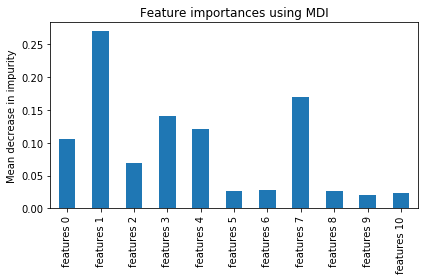

In [ ]:
importances = random_model_f.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in random_model_f.estimators_], axis = 0)
feature_names = [f'features {i}' for i in range(features.shape[1])]
forest_importances = pd.Series(importances, index = feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
feature_importances = pd.DataFrame({'features':features.columns,'feature_importance':random_model_f.feature_importances_})
feature_importances.sort_values('feature_importance',ascending = False)

,features,feature_importance
1,age,0.269558
7,salary,0.169852
3,balance,0.140002
4,num_products,0.120566
0,credit_score,0.105636
2,tenure,0.069315
6,is_active,0.027993
5,has_cr_card,0.026091
8,geography_Germany,0.025986
10,gender_Male,0.024035


### Вывод

Общий вывод: после того, как мы использовали функцию борьбы с дисбалансом значения значительно улучшились. Самой лучшей моделью после "балансировки" признана модель "Случайного леса" со следующими параметрами : class_weight = 'balanced', n_estimators = 19, max_depth = 19. F1 мера составила 0.6026, что соответствует условию нашей задачи.

## ROC AUC

В конце найдем значение roc auc для каждой модели. Построить ROC-кривую поможет функция roc_curve(). Функция перебирает разные пороги и возвращает три списка: значения FPR, значения TPR и рассмотренные пороги. Помним, что площадь ROC AUC случайной модели равна 0.5. Посчитаем какая площадь у наших 3 моделей и выведем на экран. 

In [ ]:
probabilities_tree = tree_model.predict_proba(valid_features)
probabilities_one_valid_tree = probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds = roc_curve(valid_target,probabilities_one_valid_tree)
auc_roc_tree = roc_auc_score(valid_target,probabilities_one_valid_tree)
print('Значения метрики для Дерева решений:', auc_roc_tree)

Значения метрики для Дерева решений: 0.6775794868093399


In [ ]:
probabilities_random = random_model.predict_proba(valid_features)
probabilities_two_valid = probabilities_random[:,1]
fpr_random,tpr_random,thresholds = roc_curve(valid_target,probabilities_two_valid)
auc_roc_random = roc_auc_score(valid_target,probabilities_two_valid)
print('Значения метрики для Случайного леса', auc_roc_random)

Значения метрики для Случайного леса 0.8508011837309177


In [ ]:
probabilities_log = log_model.predict_proba(valid_features)
probabilities_three_valid = probabilities_log[:,1]
fpr_log,tpr_log,thresholds = roc_curve(valid_target,probabilities_three_valid)
auc_roc_log = roc_auc_score(valid_target,probabilities_three_valid)
print('Значения метрики для Логистической регрессии', auc_roc_log)

Значения метрики для Логистической регрессии 0.7749010550122102


Построим график, на котором проверим как кривые ROC расположены относительно случайной модели. Построим график для переменных fpr и tpr.

<Figure size 432x288 with 0 Axes>

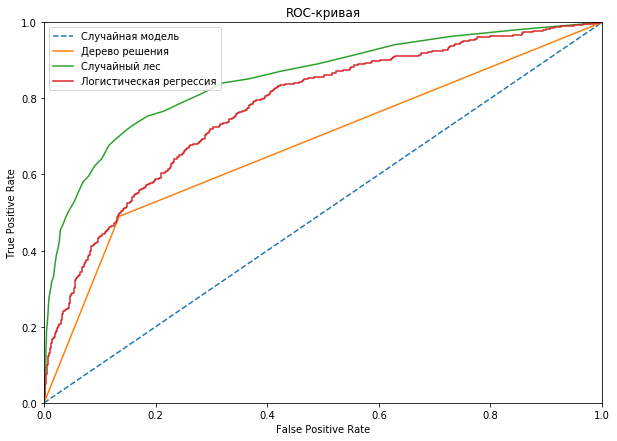

In [ ]:
plt.figure()
plt.figure(figsize = (10,7))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_random,tpr_random)
plt.plot(fpr_log,tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Дерево решения','Случайный лес','Логистическая регрессия'),
           loc = 'upper left') 
plt.show()

In [ ]:
finalle = {'Дерево Решения':np.array([tree_model_b,f1_score_tree_model_e]),'Случайный лес':np.array([f1_sc_random_model_b,f1_sc_random_model_e]),'Логистическая регрессия':np.array([f1_score_log_model,f1_score_log_a])}
finalle = pd.DataFrame(finalle, index = ['F1 без учета дисбаланса','F1 с учетом дисбаланса'])
finalle

,Дерево Решения,Случайный лес,Логистическая регрессия
F1 без учета дисбаланса,0.547651,0.601050,0.315620
F1 с учетом дисбаланса,0.568387,0.605856,0.274821


## Вывод

Мы рассмотрели предоставленную нам таблицу, удалили ненужные столбцы, привели таблицу в удобный для нас вид. Далее мы рассмотрели возможности нескольких моделей. Первоначально рассматривали без учета дисбаланса, результаты было необходимо улучшить. После этого категоризировали и стандартизировали данные.  По показателям F1 и ROC AUC самой лучшей оказалась модель Случайного леса. Однако нам необходимо понимать, что именно эта модель обучается дольше всех по времени. В задаче нам очень сильно помогла функция, которая урегулировала классы в выборке (upsample) и параметр в модели: class_weight='balanced'. Лучшее значение метрики F1: 0.6026 у модели Случайного леса.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*